<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Pabloacostatec-A01794035-/blob/main/Semana_5_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso de IBM Data Analysis with Python - Módulo 2

Juan Pablo Acosta López

A01794035


#Pre-processing data

Pre-processing data is needed in most real life use cases because there will be always errors in the data.

Pre-processing data is important to maximize the power of the machine learning models. some preprocessing are:

1.- missing values
2.- data formatting
3.- data normalization
4.- data bining

#Missing values

When a missing values exist, there are multiple forms of dealing with missing values:

1.- Check with the data source why is missed

2.- Remove data -> use dropnaan function

3.- replace values -> there are various methods: Using mean or median, for categories using mode, you can use mean and median given the category too. you can use the method replace.


#Data formatting

Data is usually collected from different places and people, data formatting is essential for machine learning. i.e you want categories to be standard across all the data set.

Categories: Use intelligent algorithms to change data

Numeric: Use formatting and float manager

Use dataframe.dtypes() to view all the types and use astype to convert it into another column

#Data normalization

When having a dataset with different columns, you cannot compare all the features if the data has a different scale. This will naturally give more weight to big numbers.

The techniques to normalize data are:

simple feature scaling = Value/max

Minmax = Value-min/max-min

Z-score = Value - Average/Std devaition

#Binning or goruping

Binning -> grouping values into bins, this helps models or data visualization

you can bin numerical values into categories using pd.cut(array, bins (using linspace for example, labels, include_lowest = true)

#Turning categorical into numerical values

"One hot encoding" creates columns for each feature and assigns into into a binary feature

The pd.get_dummies(df[column]) function does this automatically

#Laboratory

##Import data

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

#Dataset

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


##Exercise 1:
Based on the example above, replace NaN in "stroke" column with the mean value.

In [2]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [3]:
pd.set_option('display.max_rows', 10)

for column in df:
  df.replace("?", np.nan, inplace = True)
  try:
    mean_stroke=df[column].astype('float').mean(axis=0)
    df[column].replace(np.nan, mean_stroke, inplace=True)
    df[column]=df[column].apply(pd.to_numeric, errors='coerce')
  except:
    None

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [4]:
pd.set_option('display.max_rows', 10)
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
                      ...   
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
Length: 26, dtype: object


##Exercise 2 

According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".

In [5]:
df['highway-L/100km'] = 235/df["highway-mpg"]
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,8.392857
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,9.400000
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,10.217391
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,8.703704


##Exercise 3

According to the example above, normalize the column "height".

In [6]:
df['height'] = df['height']/df['height'].max() 
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,8.392857
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,9.400000
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,10.217391
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,8.703704


Text(0.5, 1.0, 'horsepower bins')

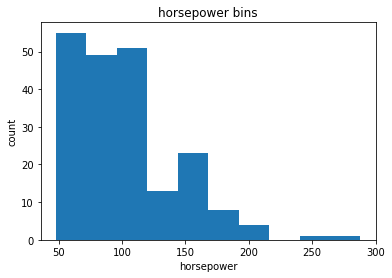

In [7]:
#Binning

df["horsepower"]=df["horsepower"].astype(int, copy=True)

import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

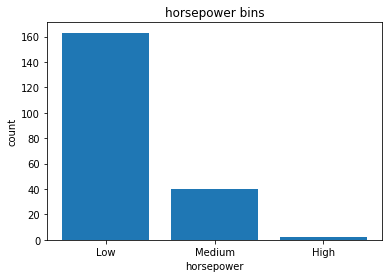

In [8]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

df["horsepower-binned"].value_counts()

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

##Exercise 4

Similar to before, create an indicator variable for the column "aspiration"

In [9]:
dummy_variable_1 = pd.get_dummies(df["aspiration"])


##Exercise 5

Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.

In [10]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("aspiration", axis = 1, inplace=True)
df

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,horsepower-binned,std,turbo
0,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000.0,21,27,13495.0,8.703704,Low,1,0
1,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,...,9.0,111,5000.0,21,27,16500.0,8.703704,Low,1,0
2,1,122.0,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,...,9.0,154,5000.0,19,26,16500.0,9.038462,Medium,1,0
3,2,164.0,audi,gas,four,sedan,fwd,front,99.8,176.6,...,10.0,102,5500.0,24,30,13950.0,7.833333,Low,1,0
4,2,164.0,audi,gas,four,sedan,4wd,front,99.4,176.6,...,8.0,115,5500.0,18,22,17450.0,10.681818,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,four,sedan,rwd,front,109.1,188.8,...,9.5,114,5400.0,23,28,16845.0,8.392857,Low,1,0
201,-1,95.0,volvo,gas,four,sedan,rwd,front,109.1,188.8,...,8.7,160,5300.0,19,25,19045.0,9.400000,Medium,0,1
202,-1,95.0,volvo,gas,four,sedan,rwd,front,109.1,188.8,...,8.8,134,5500.0,18,23,21485.0,10.217391,Medium,1,0
203,-1,95.0,volvo,diesel,four,sedan,rwd,front,109.1,188.8,...,23.0,106,4800.0,26,27,22470.0,8.703704,Low,0,1
